## <a id="2">A. Persiapan Data & Inisiasi </a>
### <a id="21"> A.1 Packages Python </a>

Sebelum memulai analisis data dan prediksi dengan menggunakan Python. Maka diperlukan **Packages (library)** yang dapat memudahkan proses analisis dan prediksi 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

pd.set_option('display.max_columns', 100)

### <a id="22">A.2 Menentukan Parameter Analisis dan Model</a>
 
Pada tahap ini digunakan untuk menentukan parameter analisis dan model.

In [2]:
RFC_METRIC = 'gini'         # metrik digunakan dengan Random Forrest Classifier
NUM_ESTIMATORS = 100        # jumlah estimator yang digunakan untuk Random Forrest Classifier
NO_JOBS = 4                 # jumlah pekerjaan paralel yang digunakan untuk Random Forrest Classifier

#VALIDASI
VALID_SIZE = 0.20           # validasi sederhana menggunakan train_test_split

#VALIDASI SILANG
NUMBER_KFOLDS = 5           # jumlah KFolds untuk validasi silang

RANDOM_STATE = 2021

MAX_ROUNDS = 1000           # iterasi lgb
EARLY_STOP = 50             # lgb berhenti lebih awal
OPT_ROUNDS = 1000           # untuk disesuaikan berdasarkan putaran validasi terbaik
VERBOSE_EVAL = 50           # cetak hasil metrik

IS_LOCAL = False

### <a id="23">A.3 Input Data (Dataset)</a> 
Pada tahap ini, Menginput dataset yang digunakan dalam analisis dan model

In [3]:
data_df = pd.read_csv('./UCI_Credit_Card.csv')
# data_df

## <a id="4">B. Pembersihan Data</a>

Pada tahap ini, akan dilakukan pengecekan dataset

In [4]:
print(" Credit Card Clients data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

 Credit Card Clients data -  rows: 30000  columns: 25


#### <a id="41"> B.1 Review Data</a>
melihat fitur data dari 3 baris pertama

In [5]:
data_df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


melihat lebih detail mengenai data, dilakukan hal sebagai berikut: 

In [6]:
data_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### <a id="42">B.2 Data yang Hilang</a>  

memperiksa apakah ada data yang hilang. 
- (Nb: Untuk memastikan apakah data anda sudah layak untuk dilakukan analisi dan model)

In [7]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,ID,BILL_AMT2,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT1,LIMIT_BAL,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0,AGE,MARRIAGE,EDUCATION,SEX,default.payment.next.month
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### <a id="43">B.3 Proporsi Sebaran Data</a>
periksa ketidakseimbangan data, hal ini tentu akan sangat mempengaruhi variabel respon, dalam hal ini saya menggunkan **default.payment.next.month**.

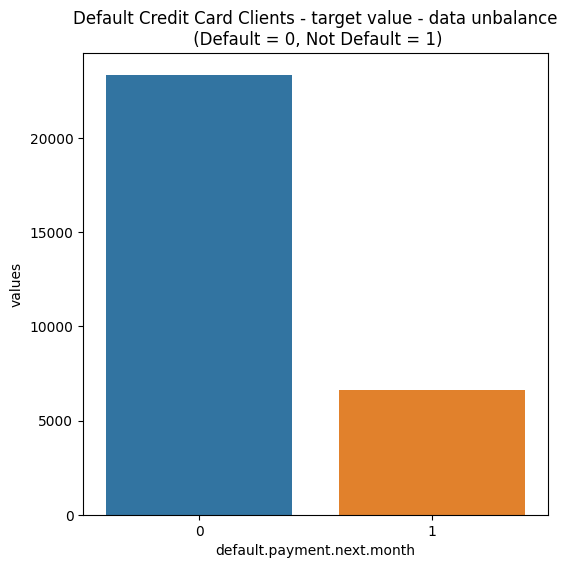

In [8]:
temp = data_df["default.payment.next.month"].value_counts()
df = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

Sejumlah 6.636 dari 30.000 (atau 22%) klien akan mengalami default bulan depan. Data tidak memiliki ketidakseimbangan besar sehubungan dengan nilai target (default.payment.next.month). 

## <a id="5">C. Eksplorasi Data</a>
### <a id="51">C.1 Batasan Kredit </a>

Pada tahap ini, dilakukan analisa sederhana mengenai batasan kredit yang biasa diberikan kepada klien (Konsumen).

C:\Users\Hasan Zidni\AppData\Local\Temp\ipykernel_12848\3218755407.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['LIMIT_BAL'],kde=True,bins=200, color="blue")


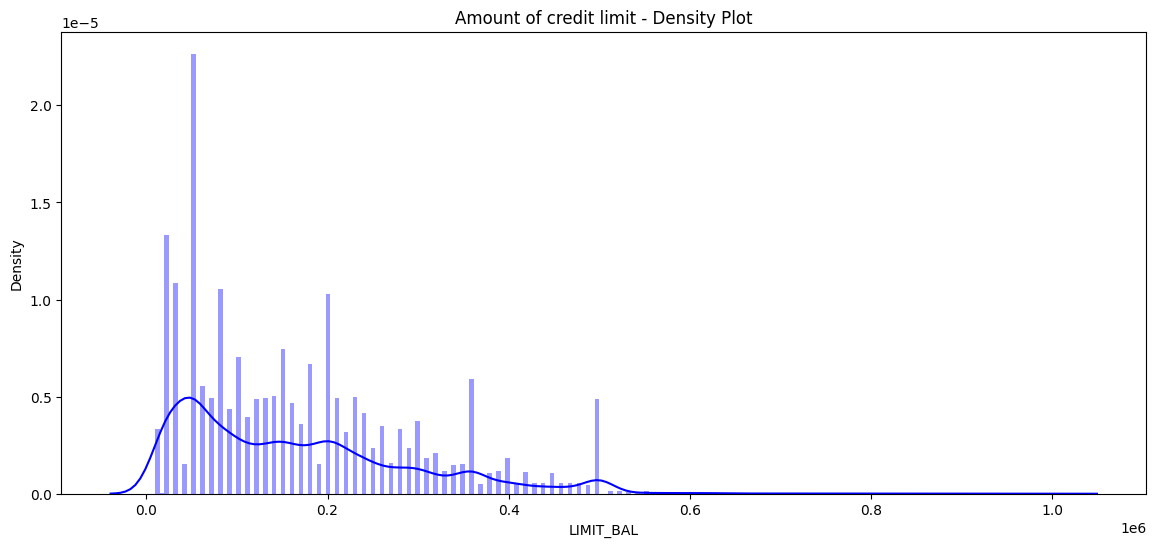

In [9]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(data_df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

Kelompok terbesar jumlah batas kredit tampaknya berkisar 50 ribuan. Untuk memverifikasi dugaan tersebut, dilakukan;

In [10]:
data_df['LIMIT_BAL'].value_counts().shape

(81,)

Ada 81 nilai berbeda untuk jumlah batas kredit.

In [11]:
data_df['LIMIT_BAL'].value_counts().head(5)

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: LIMIT_BAL, dtype: int64

Ternyata benar bahwa, jumlah kartu kredit terbesar adalah dengan batas 50.000 (3365), diikuti oleh 20.000 (1976) dan 30.000 (1610), dst.

### <a id="52">C.2 Klasifikasi Batasan Kredit</a>

Sekerang, akan diperlihatkan visualisasikan plot kepadatan untuk jumlah batas kredit (LIMIT_BAL), dikelompokkan berdasarkan pembayaran standar bulan depan


C:\Users\Hasan Zidni\AppData\Local\Temp\ipykernel_12848\4240084637.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_1,kde=True,bins=200, color="red")
C:\Users\Hasan Zidni\AppData\Local\Temp\ipykernel_12848\4240084637.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_0,kde=True,b

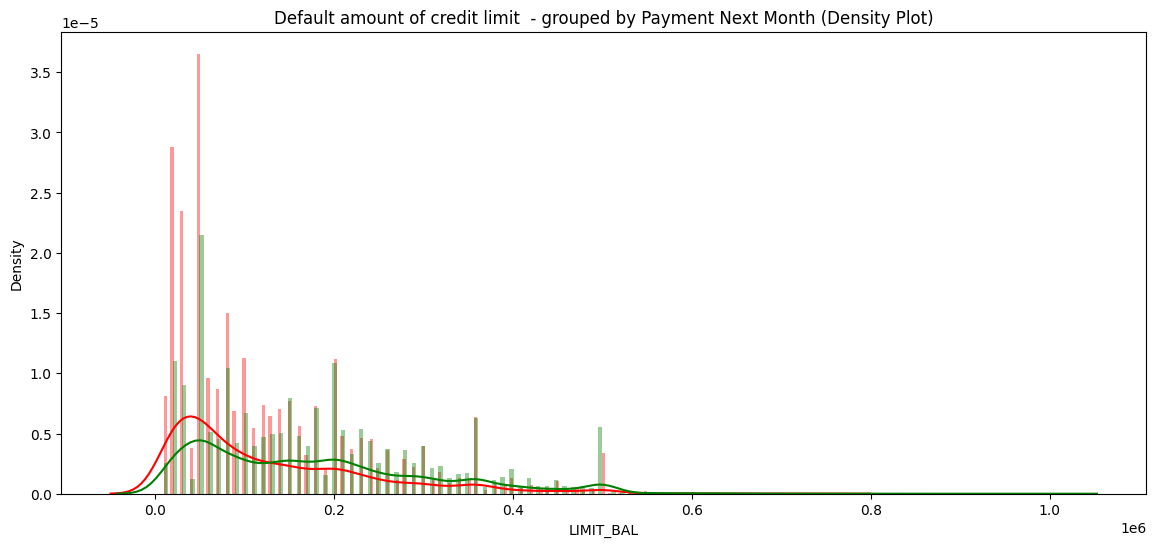

In [12]:
class_0 = data_df.loc[data_df['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = data_df.loc[data_df['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

Sebagian besar default adalah untuk batas kredit 0-100.000 (dan kepadatan untuk interval ini lebih besar untuk default daripada non-default). Jumlah default yang lebih besar adalah untuk jumlah **50.000**, **20.000** dan **30.000**.

### <a id="53">C.3 Batas Kredit vs Jenis Kelamin</a>

Pada tahap ini dilakukan analisis distribusi batas kredit vs jenis kelamin.

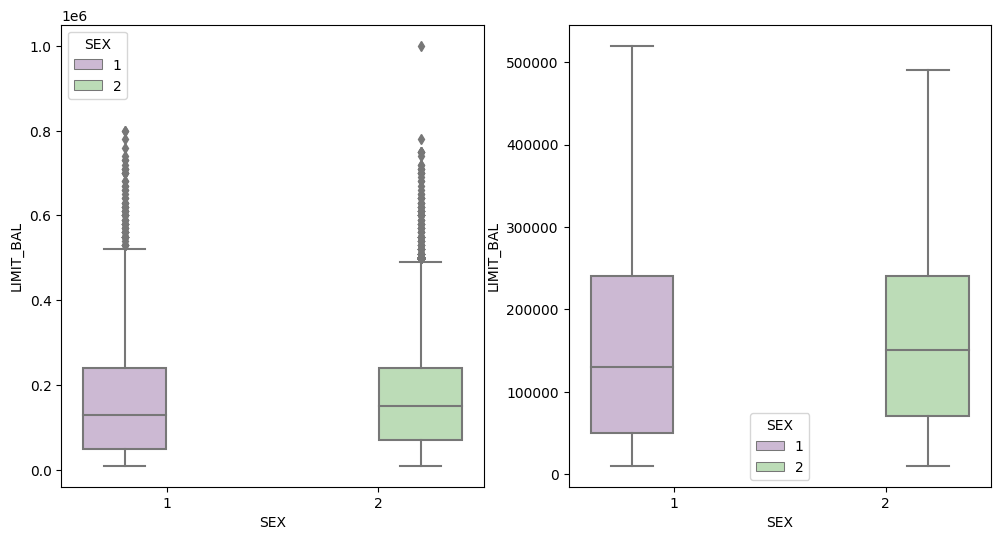

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=data_df, palette="PRGn",showfliers=False)
plt.show();

atas jumlah kredit cukup seimbang antara jenis kelamin. Laki-laki memiliki Q2 sedikit lebih kecil dan lebih besar Q3 dan Q4 dan rata-rata lebih rendah. Ditemukan bahwa wanita memiliki nilai max outlier yang lebih besar hingga kisaran (1M dolar NT).

### <a id="54">C.4 Check Korelasi</a>


Untuk data yang bernilai numerik, biasanya dilakakan analisis korelasi. Oleh sebab itu berikut ini diperiksa korelasi jumlah laporan tagihan pada bulan April - September 2005.

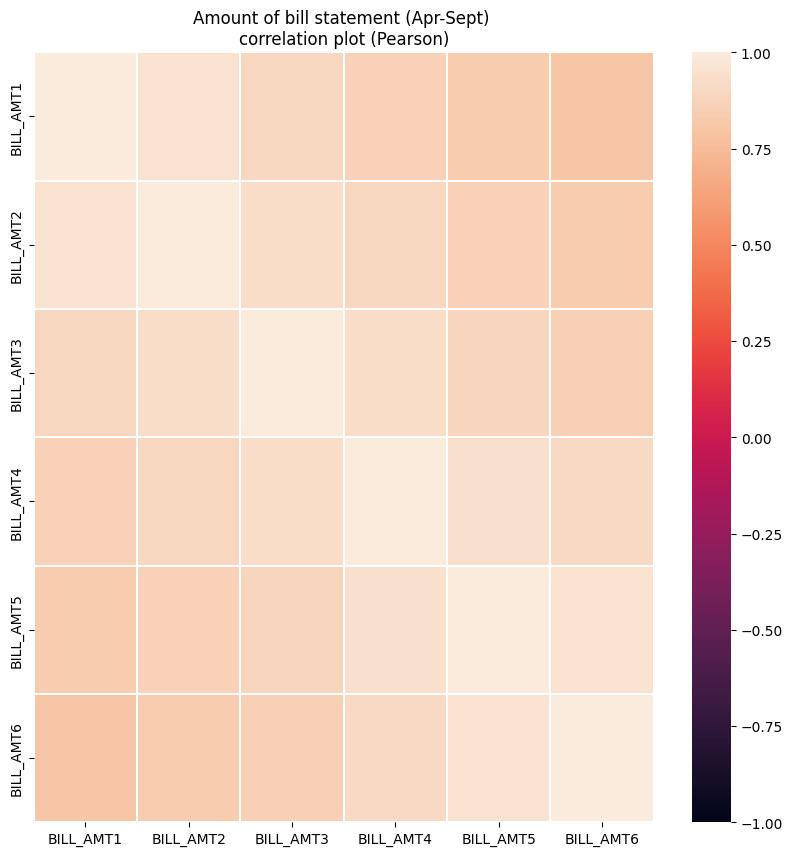

In [14]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (10,10))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Dari gambar terlihat bahwa adanya korelasi jumlah tagihan disetiap bulannya. Korelasi terendah ada pada September dan April. Oleh karena itu, berikutnya juga dilakukan pemeriksaan korelasi Jumlah pembayaran sebelumnya pada bulan April - September 2005.

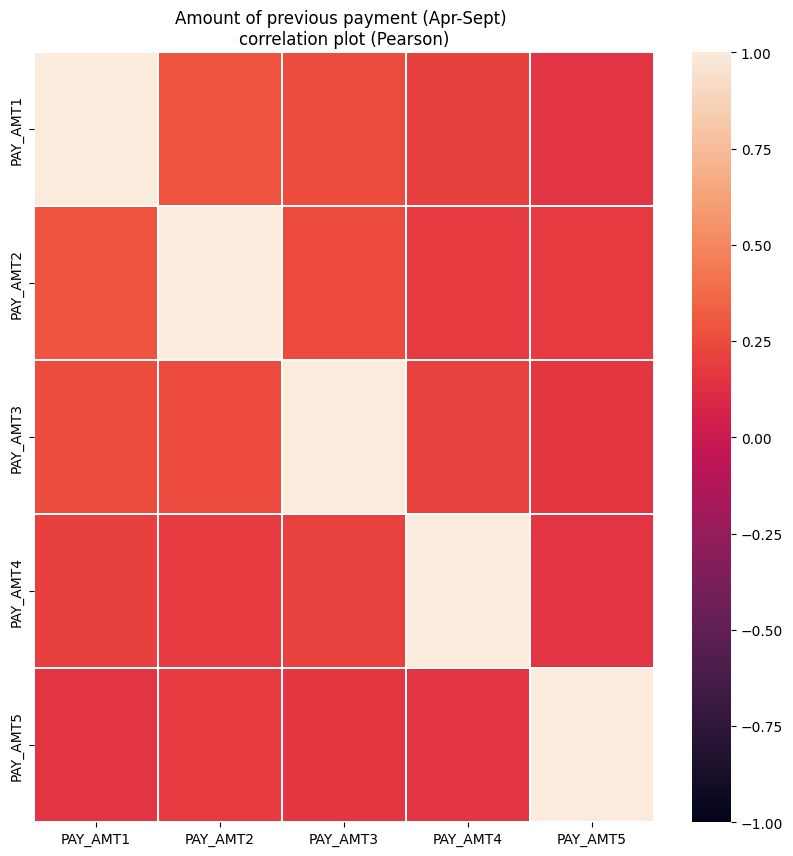

In [15]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (10,10))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Ternyata tidak ada korelasi antara jumlah pembayaran sebelumnya untuk April-September 2005. Maka diperiksa juga korelasi antara status Pelunasan pada bulan April - September 2005.

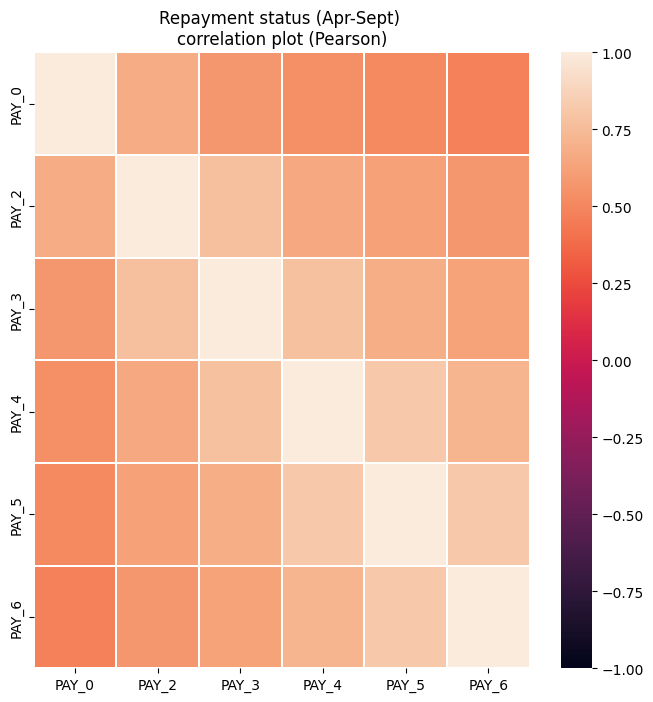

In [16]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Sejalan dengan korelasi jumlah tagihan, korelasi pembayaran juga menurun setiap bulannya. (Korelasi terendah ada pada September dan April).

## <a id="55">C.5 Jenis Kelamin, Pendidikan, Usia dan Pernikahan</a> 


Dibawah ini diperlihatkan distribusi jenis kelamin, pendidikan, usia dan pernikahan. Dimulai dengan menunjukkan Boxplot dengan distribusi usia yang dikelompokkan berdasarkan status pernikahan dan jenis kelamin.

Makna status pernikahan adalah:
* 0 : unknown (bisa diasumsikan lainnya juga)
* 1 : menikah
* 2 : tunggal
* 3 : lainnya

Arti seks adalah:
* 1 : pria
* 2 : wanita


In [17]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=data_df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

In [18]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=data_df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

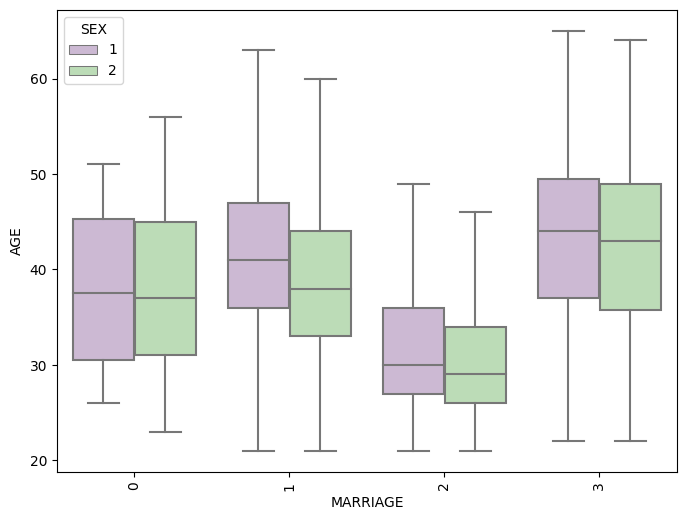

In [19]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

Seperti halnya status pernikahan 3 (lainnya), saat nilai rata-rata lebih dari 40 dan nilai Q4 lebih dari 60 berarti sebagian besar konsumen sudah menikah atau bercerai. Sementara status Menikah 0 tidak dapat ditentukan atau bercerai, karena nilai Q1 di atas nilai untuk menikah dengan kedua jenis kelamin.

Pria yang menikah memiliki usia rata-rata di atas wanita yang sudah menikah. Laki-laki yang belum menikah memiliki nilai rata-rata untuk usia di atas wanita yang belum menikah juga tetapi lebih dekat. Nilai Q3 dan Q4 untuk pria yang sudah menikah berada di atas nilai yang sesuai untuk wanita yang sudah menikah.

Melalui Boxplot tersebut terlihat dengan distribusi usia yang dikelompokkan berdasarkan pendidikan dan pernikahan.

Arti status pendidikan adalah:

* 1: sekolah pascasarjana
* 2: universitas
* 3: sekolah menengah
* 4: lainnya
* 5: tidak diketahui
* 6: tidak tahu

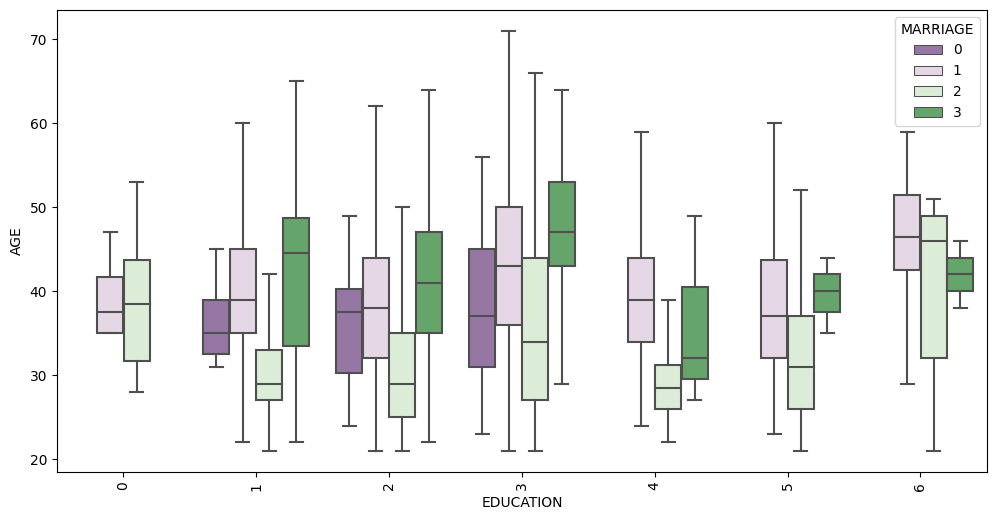

In [20]:
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

### <a id="56">C.6 Batas Usia, Jenis Kelamin, dan Jumlah Kredit</a> 


Berikut diperlihatkan boxplot dengan distribusi batas jumlah kredit yang dikelompokkan berdasarkan usia dan jenis kelamin.

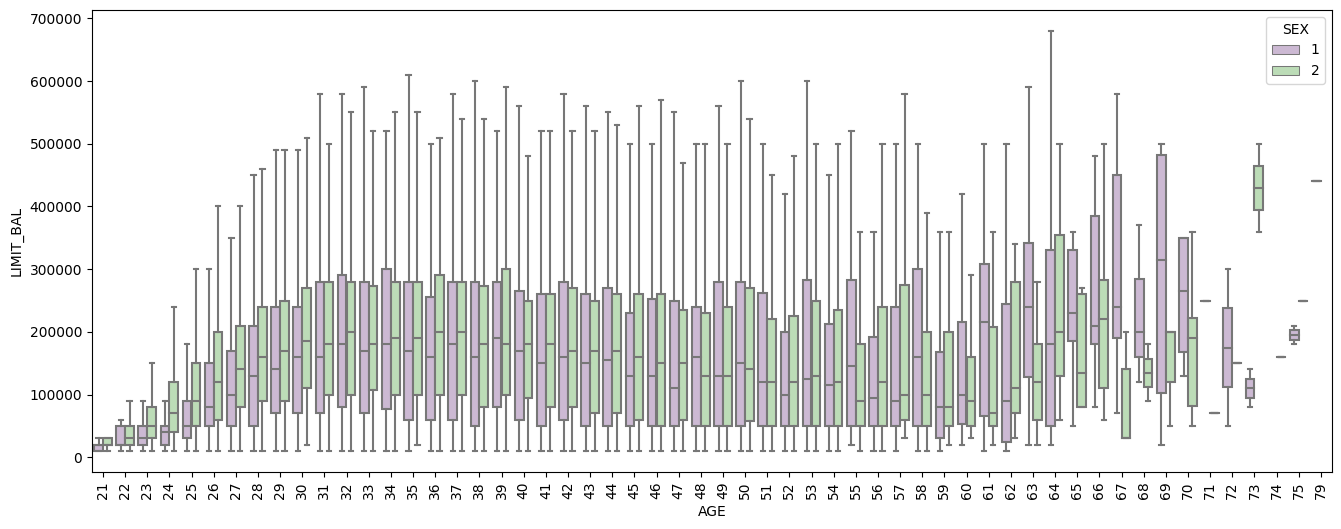

In [21]:
boxplot_variation('AGE','LIMIT_BAL', 'SEX',16)

Disimpulkan bahwa, nilai Q3 dan Q4 meningkat untuk pria dan wanita dengan usia sampai 35 tahun dan kemudian berosilasi dan mencapai maksimum Q4 untuk pria pada usia 64. Nilai rata-rata umumnya lebih kecil untuk pria daripada wanita, dengan beberapa pengecualian, misalnya pada usia 39, 48, hingga sekitar 60 tahun, di mana nilai rata-rata untuk pria umumnya lebih besar daripada wanita.


(Nb: Tentu masih banyak hal yang bisa simpulkan dari boxplot diatas, tergantung prespektif dan logikan analisa kalian masing-masing)

### <a id="57">C.7 Status Perkawinan, Pendidikan, dan Batasan Kredit</a> 


Berikut ini diperlihatkan boxplot dengan distribusi batas jumlah kredit yang dikelompokkan berdasarkan status pernikahan dan tingkat pendidikan.

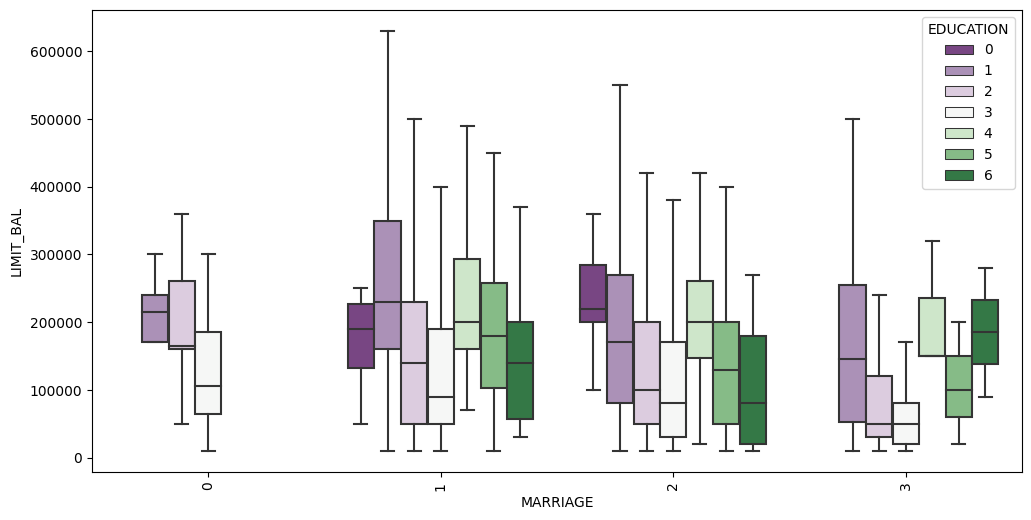

In [22]:
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

Dari Boxplot diatas dapat disimpulkan bahwa tingkat pendidikan dan status pernikahan sedikit banyaknya mempengaruhi batasan kredit setiap klien atau konsumen.

## <a id="6">D. Pemodelan Prediksi</a>  
### <a id="61">D.1 Tentukan Variabel Prediktor dan Respon</a> 

Pada tahap ini adalah penentuan variabel prediktor dan respon (target). Meninjau variabel kategorikal jika ada, kebetulan pada kasus ini tidak ada fitur kategorikal.


In [23]:
target = 'default.payment.next.month'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

### <a id="62">D.2 Split Data Training dan Data Validasi</a>

Memisahkan data training dan data validasi

In [24]:
train_df, val_df = train_test_split(data_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

Sebaiknya juga membuat salinan train_df dan val_df untuk penggunaan nanti.

In [25]:
train_df_bkp = train_df.copy()
val_df_bkp = val_df.copy()

### <a id="62">D.3 Model </a>
#### <a id="63">D.3.1 Random Forest Classifier</a>

Mari kita jalankan model menggunakan set pelatihan untuk pelatihan. Kemudian, kami akan menggunakan set validasi untuk validasi.

##### Metrik (Metric)

Pada penelitian ini digunakan kriteria validasi (validation criterion) **GINI**, yang rumusnya **GINI = 2 * (AUC) - 1**, di mana **AUC** adalah **Karakteristik Operasi Penerima - Area Di Bawah Kurva (ROC-AUC )**. Jumlah estimator diatur ke **100** dan jumlah iterasi pengulangan paralel disesuaikan dengan <a href='#8'> [4]</a>.

Berikutnya dilakukan inisialisasi Random Forest Classifier dibawah ini.

In [26]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

Berikutnya dilakukan pelatihan model Randon Forest Classifier menggunakan data train_df dan fungsi fitnya.

In [27]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2021, verbose=False)

Sekarang dilakukan prediksi nilai **target** untuk **val_df** data, menggunakan fungsi **predict**.

In [28]:
preds = clf.predict(val_df[predictors])

Sebaiknya lakukan visualisasi untuk menentukan variabel yang sangat mempengaruhi.

##### D.3.1.1 Features importance

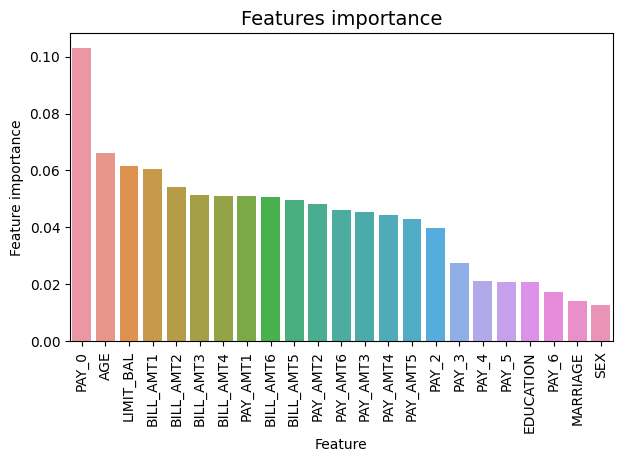

In [29]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

Fitur yang paling penting adalah **PAY_0**, **AGE**, **BILL_AMT1**, **LIMIT_BAL**, **BILL_AMT2**, **BILL_AMT3**.

##### D.3.1.2 Matriks keputusan

Berikut ditunjukkan matriks keputusan untuk hasil yang diperoleh.

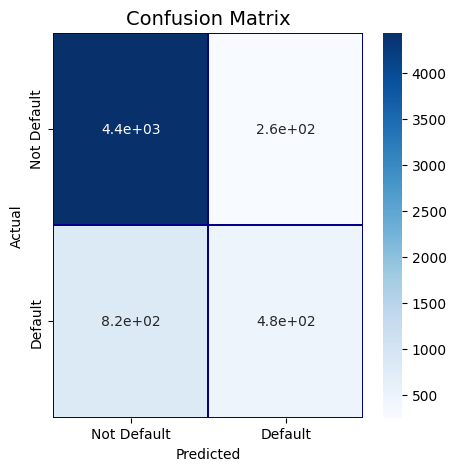

In [30]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Dapat juga dilakukan dengan menghitung persentasi area di bawah kurva sebagai berikut:

In [31]:
roc_auc_score(val_df[target].values, preds)

0.65701053075027

Skor **ROC-AUC** yang diperoleh dengan **Random Forrest Classifier** adalah **0,66**.


Berikutnya digunakan untuk Random Forrest Classifier **variabel dummi** untuk **fitur-fitur kategori**. Dapat dimulai dengan mendefinisikan fitur-fitur kategorikal.

#### <a id="64">D.3.2 Random Forrest with OneHotEncoder</a> 

In [32]:
cat_features = ['EDUCATION', 'SEX', 'MARRIAGE',
                 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [33]:
train_f_df = pd.get_dummies(train_df_bkp, columns = cat_features)
val_f_df = pd.get_dummies(val_df_bkp, columns = cat_features)

In [34]:
print("Credit Card Clients train data - rows:",train_f_df.shape[0]," columns:", train_f_df.shape[1])
print("Credit Card Clients val data - rows:",val_f_df.shape[0]," columns:", val_f_df.shape[1])

Credit Card Clients train data - rows: 24000  columns: 92
Credit Card Clients val data - rows: 6000  columns: 88


Karena data training dan validasi tidak memiliki jumlah kolom yang sama, maka kita perlu untuk menyelaraskannya.

In [35]:
train_fa_df, val_fa_df = train_f_df.align(val_f_df, join='outer', axis=1, fill_value=0)

Diperiksa lagi datanya.

In [36]:
print("Credit Card Clients train data - rows:",train_fa_df.shape[0]," columns:", train_fa_df.shape[1])
print("Credit Card Clients val data - rows:",val_fa_df.shape[0]," columns:", val_fa_df.shape[1])

Credit Card Clients train data - rows: 24000  columns: 93
Credit Card Clients val data - rows: 6000  columns: 93


In [37]:
train_fa_df.head(5)

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,ID,LIMIT_BAL,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-1,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,default.payment.next.month
21750,24,6071.0,0.0,3308.0,2527.0,1076.0,1164.0,0,0,1,0,0,0,0,21751,110000.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,3308.0,2527.0,1079.0,1167.0,1974.0,0,1,0
15992,44,49644.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,15993,50000.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
17359,49,75853.0,78983.0,133236.0,6574.0,2924.0,-626.0,0,0,1,0,0,0,0,17360,200000.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6065.0,70538.0,6634.0,10.0,0.0,0.0,0,1,0
11540,44,48850.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,11541,100000.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
10794,35,16528.0,19347.0,18600.0,19000.0,19000.0,20000.0,0,0,1,0,0,0,0,10795,20000.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3400.0,0.0,1000.0,0.0,1000.0,0.0,0,1,0


In [38]:
val_fa_df.head(5)

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,ID,LIMIT_BAL,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-1,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,default.payment.next.month
4358,25,0.0,0.0,0.0,0.0,0.0,550.0,0,1,0,0,0,0,0,4359,50000.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,550.0,0.0,0,1,1
17095,25,72120.0,71702.0,71532.0,71222.0,47538.0,48879.0,0,1,0,0,0,0,0,17096,80000.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2600.0,2700.0,2200.0,2000.0,3443.0,2000.0,0,1,0
7541,22,19875.0,19273.0,21133.0,19121.0,19663.0,20235.0,0,0,1,0,0,0,0,7542,50000.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,2500.0,0.0,1000.0,1050.0,600.0,1,0,1
4776,25,61943.0,61458.0,57045.0,50652.0,48476.0,49815.0,0,0,0,1,0,0,0,4777,80000.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2215.0,1900.0,1800.0,1920.0,2300.0,1485.0,0,1,0
3549,28,20914.0,29303.0,2515.0,7885.0,14493.0,2113.0,0,0,1,0,0,0,0,3550,50000.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,10087.0,2522.0,7951.0,14493.0,2120.0,3027.0,1,0,0


Menententukan daftar target dan prediktor.

In [39]:
target_f = 'default.payment.next.month'
predictors_f = ['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'EDUCATION_0', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'LIMIT_BAL', 'MARRIAGE_0', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-1', 'PAY_0_-2', 'PAY_0_0',
       'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6',
       'PAY_0_7', 'PAY_0_8', 'PAY_2_-1', 'PAY_2_-2', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_-1', 'PAY_3_-2', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_-1', 'PAY_4_-2', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-1',
       'PAY_5_-2', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_-2', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7',
       'PAY_6_8', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2']

Melatih **Randon Forest Classifier** menggunakan **train_fa_df** data dan fungsi **fit**.

In [40]:
clf.fit(train_fa_df[predictors_f], train_df[target_f].values)

RandomForestClassifier(n_jobs=4, random_state=2021, verbose=False)

Berikut memprediksi nilai **target** untuk **val_df** data, menggunakan fungsi **predict**.

In [41]:
preds = clf.predict(val_fa_df[predictors_f])

Memvisualisasikan fitur penting.

##### D.3.1.1 Features importance

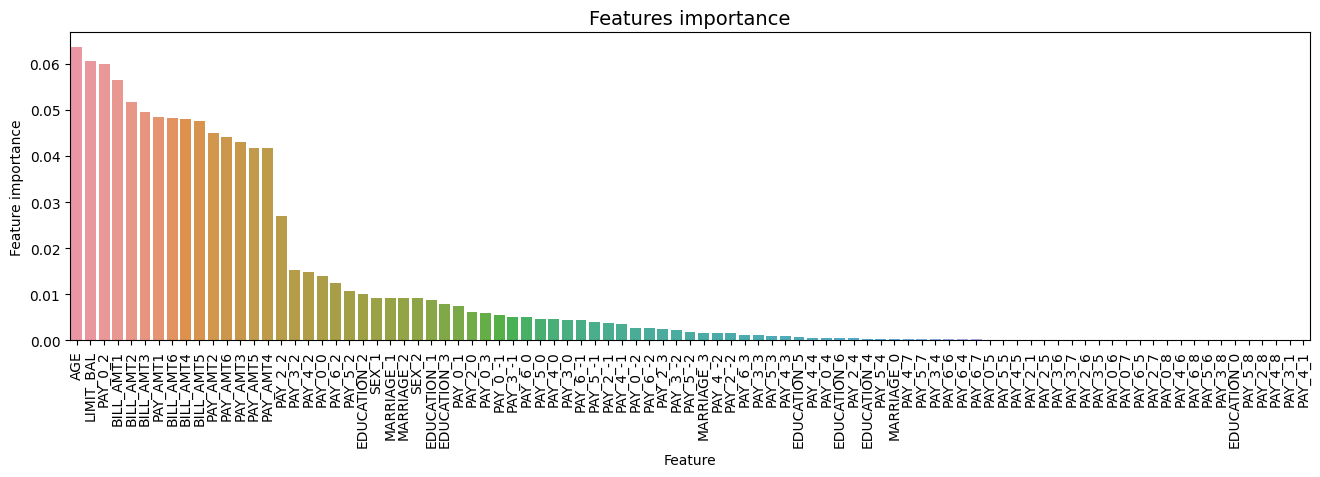

In [42]:
tmp = pd.DataFrame({'Feature': predictors_f, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (16,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

Fitur yang paling penting adalah **AGE**, **LIMIT_BAL**, **BILL_AMT1**, **PAY_0_2**, **BILL_AMT2**, **BILL_AMT3**.

##### D.3.2.2 Matriks keputusan

Tunjukkan matriks keputusan untuk hasil yang diperoleh.

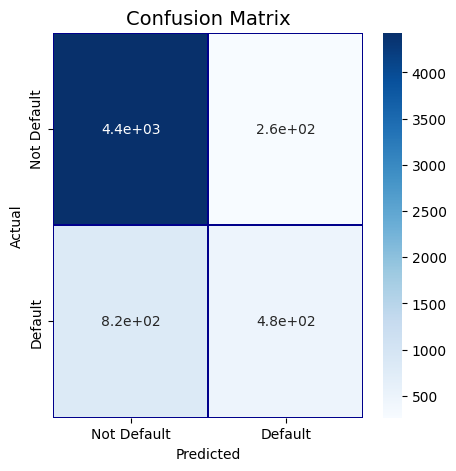

In [43]:
cm = pd.crosstab(val_fa_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Dapat juga dilakukan dengan menghitung persentasi area di bawah kurva sebagai berikut:

In [44]:
roc_auc_score(val_fa_df[target].values, preds)

0.6563712808035409

Dengan variabel tambahan (dummified), peningkatan skor AUC cukup kecil.

#### <a id="64">D.3.3 AdaBoostClassifier</a> 

AdaBoostClassifier singkatan dari Adaptive Boosting Classifier

In [45]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                            n_estimators=NUM_ESTIMATORS)

Berikutnya dilakukan pelatihan model AdaBoostClassifier menggunakan data train_df dan fungsi fitnya.

In [46]:
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2021)

Sekarang dilakukan prediksi nilai **target** untuk **val_df** data, menggunakan fungsi prediksi.

##### D.3.3.1 Features importance
Berikut diperlihatkan Variabel yang paling mempengaruhi;

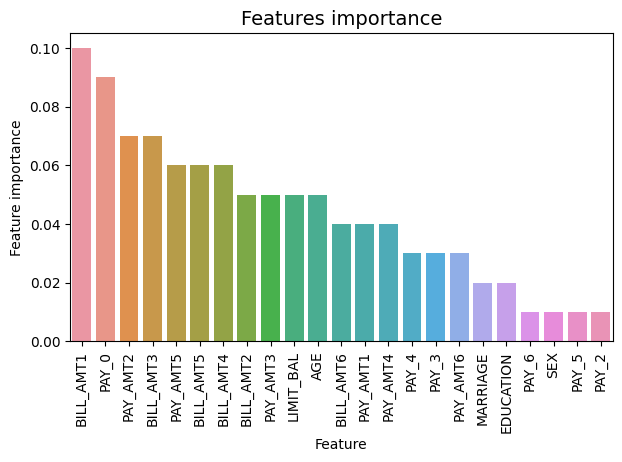

In [47]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

##### D.3.3.2 Matriks keputusan

Tunjukkan matriks keputusan untuk hasil yang diperoleh.

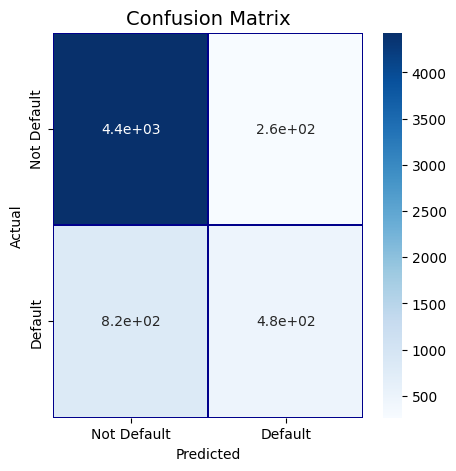

In [48]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Dapat juga dilakukan dengan menghitung persentasi area di bawah kurva sebagai berikut:

In [49]:
roc_auc_score(val_df[target].values, preds)

0.6563712808035409

Skor ROC-AUC yang diperoleh dengan AdaBoostClassifier adalah 0,65.

#### <a id="64">D.3.4 CatBoostClassifier</a> 

CatBoostClassifier adalah peningkatan gradien untuk algoritma pohon keputusan (Decision Trees) dengan dukungan untuk menangani data kategorikal.

Menentukan parameter untuk model dan menginisialisasi model.

In [50]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)

In [51]:
clf.fit(train_df[predictors], train_df[target].values,verbose=True)

0:	total: 1.01s	remaining: 8m 24s
50:	total: 35.9s	remaining: 5m 15s
100:	total: 1m 8s	remaining: 4m 31s
150:	total: 1m 43s	remaining: 3m 58s
200:	total: 2m 18s	remaining: 3m 25s
250:	total: 2m 53s	remaining: 2m 51s
300:	total: 3m 28s	remaining: 2m 17s
350:	total: 4m 7s	remaining: 1m 44s
400:	total: 4m 41s	remaining: 1m 9s
450:	total: 5m 17s	remaining: 34.5s
499:	total: 5m 51s	remaining: 0us


Prediksi nilai **target** untuk **val_df** data, menggunakan fungsi prediksi.

In [52]:
preds = clf.predict(val_df[predictors])

##### D.3.4.1 Features importance
Berikut diperlihatkan Variabel yang paling mempengaruhi;

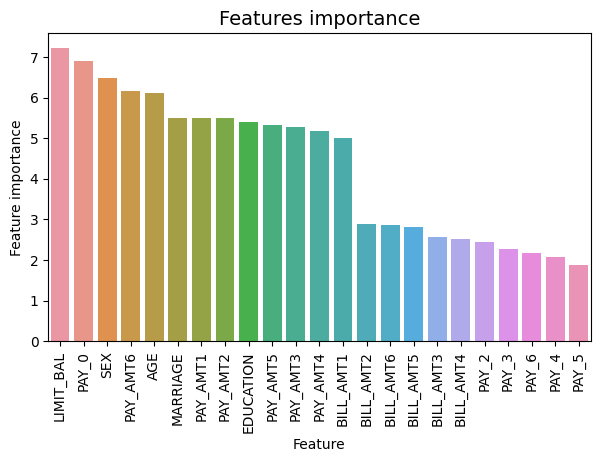

In [53]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

##### D.3.4.2 Matriks keputusan

Tunjukkan matriks keputusan untuk hasil yang diperoleh.

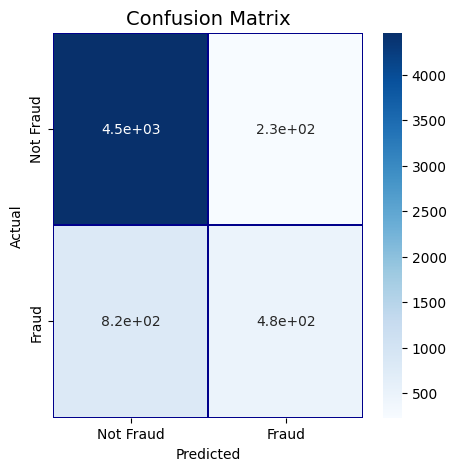

In [54]:
cm = pd.crosstab(val_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Dapat juga dilakukan dengan menghitung persentasi area di bawah kurva sebagai berikut:

In [55]:
roc_auc_score(val_df[target].values, preds)

0.659674072194975

Skor ROC-AUC yang diperoleh dengan CatBoostClassifier adalah 0,66.

#### <a id="64">D.3.5 XGBoost</a> 

XGBoost adalah algoritma peningkatan gradien.
Menginisialisasi objek DMatrix untuk pelatihan dan validasi, mulai dari dataset. Dapat juga dengan mengatur beberapa parameter yang digunakan untuk penyetelan model.

In [56]:
# siapkan data training dan data valaidasinya
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(val_df[predictors], val_df[target].values)

# Apa yang harus dipantau (dalam hal ini, ** training** dan ** validasi **)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Atur parameter xgboost nya
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [57]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[11:34:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-auc:0.69238	valid-auc:0.69939


d:\01_Activity\Learning Python\env\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[50]	train-auc:0.77015	valid-auc:0.76865
[100]	train-auc:0.77786	valid-auc:0.77322
[150]	train-auc:0.78333	valid-auc:0.77632
[200]	train-auc:0.78696	valid-auc:0.77830
[250]	train-auc:0.78972	valid-auc:0.77951
[300]	train-auc:0.79196	valid-auc:0.78067
[350]	train-auc:0.79400	valid-auc:0.78154
[400]	train-auc:0.79593	valid-auc:0.78218
[450]	train-auc:0.79752	valid-auc:0.78269
[500]	train-auc:0.79917	valid-auc:0.78319
[550]	train-auc:0.80071	valid-auc:0.78357
[600]	train-auc:0.80208	valid-auc:0.78377
[631]	train-auc:0.80296	valid-auc:0.78380


Skor validasi terbaik (ROC-AUC) adalah **0,78**, pada iterasi **391**. 


(Nb: Setiap kali anda melekukan simulasi, kemungkinan besar akan memberikan hasil yang berbeda-beda). Tetapi hasil yang diperoleh tidak akan berbeda jauh.

##### D.3.5.1 Features importance
Berikut diperlihatkan Variabel yang paling mempengaruhi;

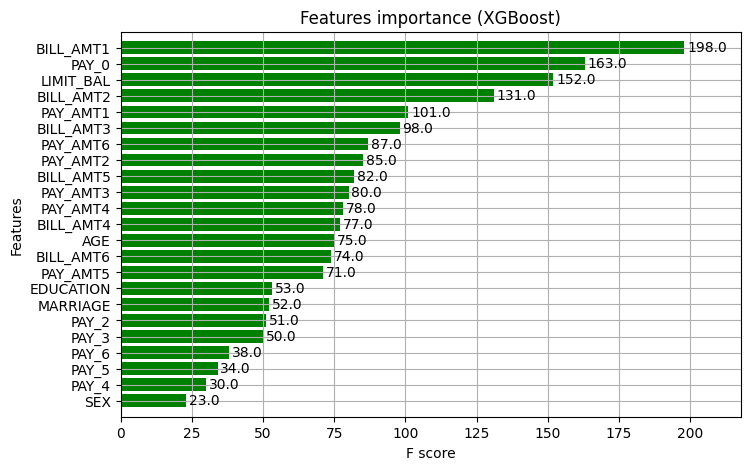

In [58]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

#### <a id="64">D.3.6 LightGBM</a> 

Dilanjutkan dengan algoritma peningkatan gradien lain, LightGBM

In [59]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,                          # ini harus lebih kecil dari 2^(max_depth)
          'max_depth': 4,                           
          'min_child_samples': 100,                 # jumlah minimum data yang diperlukan (min_data_in_leaf)
          'max_bin': 100,                           # jumlah tempat penyimpanan untuk nilai fitur
          'subsample': 0.9,                         # rasio untuk subsampel yang di training
          'subsample_freq': 1,                      # frekuensi subsampel, <=0 tidak memungkinkan
          'colsample_bytree': 0.7,                  # rasio subsampel saat membuat setiap pohon keputusannya.
          'min_child_weight': 0,                    # Jumlah minimum bobot yang dibutuhkan setiap cabang (leaf)
          'min_split_gain': 0,                      # lambda_l1, lambda_l2 dan min_gain_to_split untuk regularisasi
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':50,                    # because training data is sightly unbalanced 
         }

Menententukan fitur kategorikal.

In [60]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

Mari kita siapkan model, membuat struktur **dataset** dari data training dan validasi.

Menginisialisasi dataset dengan daftar fitur kategorikal (lgb memiliki perlakuan khusus untuk nilai-nilai kategorikal).

In [61]:
dtrain = lgb.Dataset(train_df[predictors].values, 
                     label=train_df[target].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

dvalid = lgb.Dataset(val_df[predictors].values,
                     label=val_df[target].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

Bentuk model dengan menggunakan fungsi training.

In [62]:
evals_results = {}

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)

del dvalid
gc.collect()

d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:260: UserWar

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 50 rounds


d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[50]	train's auc: 0.778205	valid's auc: 0.772065
[100]	train's auc: 0.789331	valid's auc: 0.78026
[150]	train's auc: 0.794759	valid's auc: 0.783016
[200]	train's auc: 0.799694	valid's auc: 0.784026
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[250]	train's auc: 0.803824	valid's auc: 0.784446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[300]	train's auc: 0.807309	valid's auc: 0.784969
[350]	train's auc: 0.810906	valid's auc: 0.785154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[400]	train's auc: 0.814022	valid's auc: 0.785983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[450]	train's auc: 0.817073	valid's auc: 0.786434
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[500]	train's auc: 0.820284	valid's auc: 0.786371
Early stopping, best iteration is:
[479]	train's auc: 0.818948	valid's auc: 0.786558


55229

Skor validasi terbaik diperoleh untuk putaran 254, dimana AUC ~ = 0,78. Berikut juga diperlihatkan plot variabel pengaruh.

(Nb: Setiap kali anda melekukan simulasi, kemungkinan besar akan memberikan hasil yang berbeda-beda). Tetapi hasil yang diperoleh tidak akan berbeda jauh.

##### D.3.6.1 Features importance
Berikut diperlihatkan Variabel yang paling mempengaruhi;

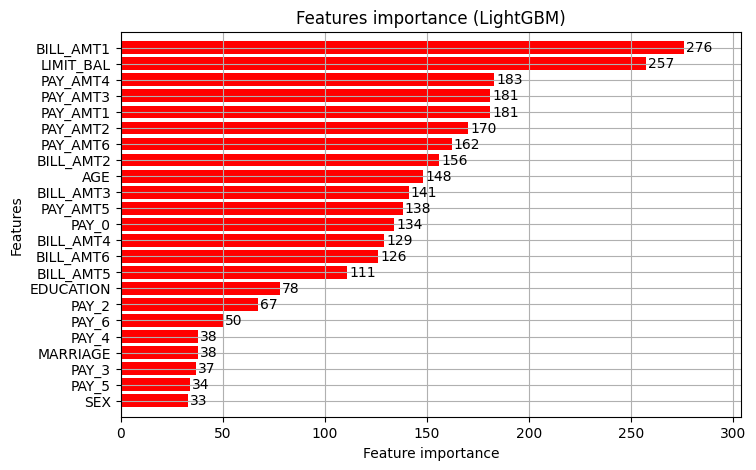

In [63]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red") 
plt.show()

##### D.3.6.2 elatihan dan validasi menggunakan validasi silang (cross-validation)

Berikut digunakan validasi, akan menggunakan cross-validation (KFolds) dengan 5 kali pengulangan. Data dibagi dalam 5 bagian dan, secara rotasi, sehingga pengujian menggunakan pengulagan 4 (n-1) dan memvalidasi hingga menggunakan pengulagan ke-5 (n).

In [64]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)
for train_index, test_index in kf.split(data_df):
    train_X, valid_X = data_df.iloc[train_index], data_df.iloc[test_index]

    dtrain = lgb.Dataset(train_X[predictors].values, label=train_X[target].values,
                     feature_name=predictors)

    dvalid = lgb.Dataset(valid_X[predictors].values, label=valid_X[target].values,
                     feature_name=predictors)

    evals_results = {}
    model =  lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)

d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008450 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.777635	valid's auc: 0.771924
[100]	train's auc: 0.787959	valid's auc: 0.780115
[150]	train's auc: 0.793803	valid's auc: 0.783018
[200]	train's auc: 0.798692	valid's auc: 0.784212
[250]	train's auc: 0.802928	valid's auc: 0.784303
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[300]	train's auc: 0.806288	valid's auc: 0.784439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[350]	train's auc: 0.810217	valid's auc: 0.785762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[400]	train's auc: 0.813513	valid's auc: 0.785507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[358]	train's auc: 0.810818	valid's auc:

d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005531 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.781392	valid's auc: 0.763148
[100]	train's auc: 0.790639	valid's auc: 0.773889
[150]	train's auc: 0.796617	valid's auc: 0.776542
[200]	train's auc: 0.8012	valid's auc: 0.776701
[250]	train's auc: 0.805837	valid's auc: 0.776956
Early stopping, best iteration is:
[223]	train's auc: 0.80374	valid's auc: 0.7771


d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005901 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.779057	valid's auc: 0.775292
[100]	train's auc: 0.788225	valid's auc: 0.780792
[150]	train's auc: 0.794961	valid's auc: 0.783977
[200]	train's auc: 0.799833	valid's auc: 0.785268
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[250]	train's auc: 0.80414	valid's auc: 0.785507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[232]	train's auc: 0.802751	valid's auc: 0.785841
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005988 seconds.
You can set `force_col_wise=true` 

d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'

[50]	train's auc: 0.778459	valid's auc: 0.772674
[100]	train's auc: 0.789057	valid's auc: 0.780369
[150]	train's auc: 0.794758	valid's auc: 0.781893
[200]	train's auc: 0.800931	valid's auc: 0.783096
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[250]	train's auc: 0.80524	valid's auc: 0.782965
Early stopping, best iteration is:
[209]	train's auc: 0.801907	valid's auc: 0.783337
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004852 seconds.
You can set `force_col_wise=true` to remove the overhead.


d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
d:\01_Activity\Learning Python\env\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'

Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.777531	valid's auc: 0.778989
[100]	train's auc: 0.787442	valid's auc: 0.789271
[150]	train's auc: 0.793447	valid's auc: 0.790333
Early stopping, best iteration is:
[139]	train's auc: 0.792061	valid's auc: 0.790719


Validasi rata-rata **AUC** untuk 5 kali pengulangan yang diperoleh adalah **0,80**, dengan nilai antara **0,79** dan **0,80**.